                                            Water Anomaly Detection Project

This project consist of the Anomaly Detection of the Water Consumption Dataset. This dataset basicalyy shows the time consumption dataset across different buildings, zones and facility types over time. 

The insights which this dataset gives us is that, this dataset can be used for: 

1. Consumption Analysis: 
     
     Water usage trends over time 
     
     Peak usage hours 
     
     Seasonal demand  

2. Operational Insights: 
        
        Which building type cconsumes more water 
        
        Comparison between the zones 


Here, for the anomaly detection, we will be using the Unsupervised Machine Learning Models for the detection which are as: 

1. Isolation Forest: The isolation forest is a machine learning algorithm that helpps in detecting the global anomalies from a data. 

2. Local outlier Factor: This ML Algorithm is used for predicting the local anomalies. 

3. Robust Covariance : This model helps in detecting the statistical anomalies. 

In [1]:
# importing the libraries 
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns 

In [2]:
data = pd.read_csv("water.csv") 
data 

,timestamp,Panther_lodging_Cora,Panther_office_Hannah,Panther_lodging_Hattie,Panther_education_Teofila,Panther_education_Jerome,Panther_retail_Felix,Panther_parking_Asia,Panther_lodging_Heather,Panther_education_Misty,...,Wolf_education_Loren,Wolf_education_Roderick,Wolf_education_Josefa,Wolf_education_Dorris,Wolf_retail_Toshia,Wolf_retail_Harriett,Wolf_office_Bobbie,Wolf_education_Miguel,Wolf_assembly_Elaine,Wolf_education_Ursula
0,2016-01-01 00:00:00,378.541,0.0,13248.935,0.3785,75.7082,378.541,0.0,0.0000,0.0,...,63.4013,0.0,2.6417,0.0,0.0000,3.9626,5.2834,31.7006,96.9511,44.9092
1,2016-01-01 01:00:00,378.541,0.0,13248.935,0.3785,75.7082,378.541,0.0,0.0000,0.0,...,63.4013,0.0,1.3209,0.0,0.0000,5.2834,7.9252,34.3424,96.4228,42.2675
2,2016-01-01 02:00:00,757.082,0.0,12870.394,0.0000,75.7082,378.541,0.0,0.0000,0.0,...,68.6847,0.0,2.6417,0.0,0.0000,3.9626,10.5669,31.7006,96.6870,44.9092
3,2016-01-01 03:00:00,757.082,0.0,13248.935,0.3785,75.7082,378.541,0.0,0.0000,NaN,...,60.7596,0.0,2.6417,0.0,0.0000,3.9626,13.2086,200.7707,96.4228,44.9092
4,2016-01-01 04:00:00,757.082,0.0,13627.476,0.0000,75.7082,757.082,0.0,0.0000,0.0,...,68.6847,0.0,1.3209,0.0,0.0000,3.9626,10.5669,31.7006,97.4795,44.9092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2017-12-31 19:00:00,1514.164,0.0,378.541,0.0000,37.8541,378.541,0.0,37.8541,0.0,...,50.1927,0.0,0.0000,0.0,10.5669,7.9252,31.7006,0.0000,0.7925,55.4761
17540,2017-12-31 20:00:00,757.082,0.0,0.000,0.0000,37.8541,378.541,0.0,37.8541,0.0,...,76.6099,0.0,0.0000,0.0,10.5669,6.6043,29.0589,0.0000,0.0000,50.1927
17541,2017-12-31 21:00:00,1135.623,0.0,0.000,29.1477,75.7082,0.000,0.0,75.7082,0.0,...,44.9092,0.0,0.0000,0.0,10.5669,6.6043,26.4172,0.0000,0.0000,52.8344
17542,2017-12-31 22:00:00,1514.164,0.0,0.000,0.0000,37.8541,378.541,0.0,75.7082,0.0,...,76.6099,0.0,0.0000,0.0,10.5669,3.9626,26.4172,0.0000,0.0000,55.4761


Now, we will be carrying out the whole analysis on the dataset to carry out the further pre processing. 

In [3]:
data.info() 
# Here, thi is the info of the whole data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Columns: 147 entries, timestamp to Wolf_education_Ursula
dtypes: float64(146), object(1)
memory usage: 19.7+ MB


In [4]:
data.describe() 

,Panther_lodging_Cora,Panther_office_Hannah,Panther_lodging_Hattie,Panther_education_Teofila,Panther_education_Jerome,Panther_retail_Felix,Panther_parking_Asia,Panther_lodging_Heather,Panther_education_Misty,Panther_office_Catherine,...,Wolf_education_Loren,Wolf_education_Roderick,Wolf_education_Josefa,Wolf_education_Dorris,Wolf_retail_Toshia,Wolf_retail_Harriett,Wolf_office_Bobbie,Wolf_education_Miguel,Wolf_assembly_Elaine,Wolf_education_Ursula
count,17488.000000,17463.000000,17488.000000,17488.000000,17487.000000,17488.000000,17406.0,17484.000000,16638.0,17469.000000,...,17542.000000,17542.000000,17539.000000,17543.000000,17543.000000,17536.000000,17542.000000,17543.000000,17542.000000,17539.000000
mean,4794.753818,15.189978,2552.805350,624.885041,326.732381,612.810864,0.0,160.773837,0.0,93.347010,...,252.188332,4.314221,27.357445,349.057301,129.822250,142.849246,70.577384,67.384868,143.291142,215.365775
std,3242.395343,25.232837,1954.310886,1001.455408,247.703736,437.741974,0.0,173.626217,0.0,212.002025,...,241.213824,9.481938,43.928995,502.293368,158.718108,124.873790,59.626298,81.780444,244.197578,168.409530
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,18.492000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1892.705000,0.000000,757.082000,3.406900,151.416400,378.541000,0.0,37.854100,0.0,0.000000,...,76.609900,0.000000,0.000000,0.000000,10.566900,34.342400,26.417200,13.208600,3.698400,63.401300
50%,4542.492000,0.000000,2271.246000,124.161400,264.978700,378.541000,0.0,113.562300,0.0,0.000000,...,129.444300,0.000000,0.000000,13.208600,52.834400,112.273100,42.267500,29.058900,61.552100,147.936300
75%,7192.279000,26.497900,3785.410000,895.344125,416.395100,757.082000,0.0,227.124600,0.0,0.000000,...,390.974600,3.962600,47.551000,620.804200,221.904500,224.546200,108.310500,97.743600,124.953400,367.199100
max,52617.199000,268.764100,14763.099000,10208.872200,2914.765700,5261.719900,0.0,2725.495200,0.0,2649.787000,...,2337.922200,142.652900,283.984900,3032.694600,1067.254900,1158.394200,375.124200,2110.734300,1668.510400,1513.705600


In [5]:
data.shape 

(17544, 147)

In [6]:
# conversion of the timestamp column to the date time column as; 

data['timestamp'] =  pd.to_datetime(data['timestamp']) 
data 

,timestamp,Panther_lodging_Cora,Panther_office_Hannah,Panther_lodging_Hattie,Panther_education_Teofila,Panther_education_Jerome,Panther_retail_Felix,Panther_parking_Asia,Panther_lodging_Heather,Panther_education_Misty,...,Wolf_education_Loren,Wolf_education_Roderick,Wolf_education_Josefa,Wolf_education_Dorris,Wolf_retail_Toshia,Wolf_retail_Harriett,Wolf_office_Bobbie,Wolf_education_Miguel,Wolf_assembly_Elaine,Wolf_education_Ursula
0,2016-01-01 00:00:00,378.541,0.0,13248.935,0.3785,75.7082,378.541,0.0,0.0000,0.0,...,63.4013,0.0,2.6417,0.0,0.0000,3.9626,5.2834,31.7006,96.9511,44.9092
1,2016-01-01 01:00:00,378.541,0.0,13248.935,0.3785,75.7082,378.541,0.0,0.0000,0.0,...,63.4013,0.0,1.3209,0.0,0.0000,5.2834,7.9252,34.3424,96.4228,42.2675
2,2016-01-01 02:00:00,757.082,0.0,12870.394,0.0000,75.7082,378.541,0.0,0.0000,0.0,...,68.6847,0.0,2.6417,0.0,0.0000,3.9626,10.5669,31.7006,96.6870,44.9092
3,2016-01-01 03:00:00,757.082,0.0,13248.935,0.3785,75.7082,378.541,0.0,0.0000,NaN,...,60.7596,0.0,2.6417,0.0,0.0000,3.9626,13.2086,200.7707,96.4228,44.9092
4,2016-01-01 04:00:00,757.082,0.0,13627.476,0.0000,75.7082,757.082,0.0,0.0000,0.0,...,68.6847,0.0,1.3209,0.0,0.0000,3.9626,10.5669,31.7006,97.4795,44.9092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2017-12-31 19:00:00,1514.164,0.0,378.541,0.0000,37.8541,378.541,0.0,37.8541,0.0,...,50.1927,0.0,0.0000,0.0,10.5669,7.9252,31.7006,0.0000,0.7925,55.4761
17540,2017-12-31 20:00:00,757.082,0.0,0.000,0.0000,37.8541,378.541,0.0,37.8541,0.0,...,76.6099,0.0,0.0000,0.0,10.5669,6.6043,29.0589,0.0000,0.0000,50.1927
17541,2017-12-31 21:00:00,1135.623,0.0,0.000,29.1477,75.7082,0.000,0.0,75.7082,0.0,...,44.9092,0.0,0.0000,0.0,10.5669,6.6043,26.4172,0.0000,0.0000,52.8344
17542,2017-12-31 22:00:00,1514.164,0.0,0.000,0.0000,37.8541,378.541,0.0,75.7082,0.0,...,76.6099,0.0,0.0000,0.0,10.5669,3.9626,26.4172,0.0000,0.0000,55.4761


In [7]:
# Finding the missing values from the whole dataset as: 
data.isnull().sum() 

timestamp                     0
Panther_lodging_Cora         56
Panther_office_Hannah        81
Panther_lodging_Hattie       56
Panther_education_Teofila    56
                             ..
Wolf_retail_Harriett          8
Wolf_office_Bobbie            2
Wolf_education_Miguel         1
Wolf_assembly_Elaine          2
Wolf_education_Ursula         5
Length: 147, dtype: int64

Here, in the above code, as we can see that there  are a lot of missing values in the dataset, which needs to be handled. 

In [8]:
x = data.drop(['timestamp'], axis  =1) 
x  

#  Time stamp column has been removed here from the dataset 

,Panther_lodging_Cora,Panther_office_Hannah,Panther_lodging_Hattie,Panther_education_Teofila,Panther_education_Jerome,Panther_retail_Felix,Panther_parking_Asia,Panther_lodging_Heather,Panther_education_Misty,Panther_office_Catherine,...,Wolf_education_Loren,Wolf_education_Roderick,Wolf_education_Josefa,Wolf_education_Dorris,Wolf_retail_Toshia,Wolf_retail_Harriett,Wolf_office_Bobbie,Wolf_education_Miguel,Wolf_assembly_Elaine,Wolf_education_Ursula
0,378.541,0.0,13248.935,0.3785,75.7082,378.541,0.0,0.0000,0.0,0.000,...,63.4013,0.0,2.6417,0.0,0.0000,3.9626,5.2834,31.7006,96.9511,44.9092
1,378.541,0.0,13248.935,0.3785,75.7082,378.541,0.0,0.0000,0.0,0.000,...,63.4013,0.0,1.3209,0.0,0.0000,5.2834,7.9252,34.3424,96.4228,42.2675
2,757.082,0.0,12870.394,0.0000,75.7082,378.541,0.0,0.0000,0.0,0.000,...,68.6847,0.0,2.6417,0.0,0.0000,3.9626,10.5669,31.7006,96.6870,44.9092
3,757.082,0.0,13248.935,0.3785,75.7082,378.541,0.0,0.0000,NaN,0.000,...,60.7596,0.0,2.6417,0.0,0.0000,3.9626,13.2086,200.7707,96.4228,44.9092
4,757.082,0.0,13627.476,0.0000,75.7082,757.082,0.0,0.0000,0.0,0.000,...,68.6847,0.0,1.3209,0.0,0.0000,3.9626,10.5669,31.7006,97.4795,44.9092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,1514.164,0.0,378.541,0.0000,37.8541,378.541,0.0,37.8541,0.0,0.000,...,50.1927,0.0,0.0000,0.0,10.5669,7.9252,31.7006,0.0000,0.7925,55.4761
17540,757.082,0.0,0.000,0.0000,37.8541,378.541,0.0,37.8541,0.0,0.000,...,76.6099,0.0,0.0000,0.0,10.5669,6.6043,29.0589,0.0000,0.0000,50.1927
17541,1135.623,0.0,0.000,29.1477,75.7082,0.000,0.0,75.7082,0.0,378.541,...,44.9092,0.0,0.0000,0.0,10.5669,6.6043,26.4172,0.0000,0.0000,52.8344
17542,1514.164,0.0,0.000,0.0000,37.8541,378.541,0.0,75.7082,0.0,0.000,...,76.6099,0.0,0.0000,0.0,10.5669,3.9626,26.4172,0.0000,0.0000,55.4761


In [9]:
x = x.apply(pd.to_numeric, errors = 'coerce') 
x  = x.fillna(x.mean()) 

x 

,Panther_lodging_Cora,Panther_office_Hannah,Panther_lodging_Hattie,Panther_education_Teofila,Panther_education_Jerome,Panther_retail_Felix,Panther_parking_Asia,Panther_lodging_Heather,Panther_education_Misty,Panther_office_Catherine,...,Wolf_education_Loren,Wolf_education_Roderick,Wolf_education_Josefa,Wolf_education_Dorris,Wolf_retail_Toshia,Wolf_retail_Harriett,Wolf_office_Bobbie,Wolf_education_Miguel,Wolf_assembly_Elaine,Wolf_education_Ursula
0,378.541,0.0,13248.935,0.3785,75.7082,378.541,0.0,0.0000,0.0,0.000,...,63.4013,0.0,2.6417,0.0,0.0000,3.9626,5.2834,31.7006,96.9511,44.9092
1,378.541,0.0,13248.935,0.3785,75.7082,378.541,0.0,0.0000,0.0,0.000,...,63.4013,0.0,1.3209,0.0,0.0000,5.2834,7.9252,34.3424,96.4228,42.2675
2,757.082,0.0,12870.394,0.0000,75.7082,378.541,0.0,0.0000,0.0,0.000,...,68.6847,0.0,2.6417,0.0,0.0000,3.9626,10.5669,31.7006,96.6870,44.9092
3,757.082,0.0,13248.935,0.3785,75.7082,378.541,0.0,0.0000,0.0,0.000,...,60.7596,0.0,2.6417,0.0,0.0000,3.9626,13.2086,200.7707,96.4228,44.9092
4,757.082,0.0,13627.476,0.0000,75.7082,757.082,0.0,0.0000,0.0,0.000,...,68.6847,0.0,1.3209,0.0,0.0000,3.9626,10.5669,31.7006,97.4795,44.9092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,1514.164,0.0,378.541,0.0000,37.8541,378.541,0.0,37.8541,0.0,0.000,...,50.1927,0.0,0.0000,0.0,10.5669,7.9252,31.7006,0.0000,0.7925,55.4761
17540,757.082,0.0,0.000,0.0000,37.8541,378.541,0.0,37.8541,0.0,0.000,...,76.6099,0.0,0.0000,0.0,10.5669,6.6043,29.0589,0.0000,0.0000,50.1927
17541,1135.623,0.0,0.000,29.1477,75.7082,0.000,0.0,75.7082,0.0,378.541,...,44.9092,0.0,0.0000,0.0,10.5669,6.6043,26.4172,0.0000,0.0000,52.8344
17542,1514.164,0.0,0.000,0.0000,37.8541,378.541,0.0,75.7082,0.0,0.000,...,76.6099,0.0,0.0000,0.0,10.5669,3.9626,26.4172,0.0000,0.0000,55.4761


No, comes the part of the application of the SStandard Scaling Features for the further preprocessing. 

In [10]:
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler()  

scaled_data = sc.fit_transform(x) 

scaled_data = np.nan_to_num(scaled_data) 

c:\Users\91981\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\91981\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\91981\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


# Model Training 
Now, comes the part of the model training for applying the Unsupervised Machine Learning Algorithm and the further proessing of the data. 

In the below models, 1 represnets anomaly and 0 represents no anomaly. 

In [11]:
from sklearn.ensemble import IsolationForest  

iso_model = IsolationForest(contamination = 0.02, random_state = 42) 

iso_model 

,n_estimators,100
,max_samples,'auto'
,contamination,0.02
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False


In [12]:
iso_pred = iso_model.fit_predict(scaled_data) 
iso_pred = np.where(iso_pred == -1,1,0) 

iso_pred 

array([0, 0, 0, ..., 0, 0, 0], shape=(17544,))

In [13]:
# Now, comes the execution of the LOF Algorithm 
from sklearn.neighbors import LocalOutlierFactor
lof_model = LocalOutlierFactor(n_neighbors = 20, contamination = 0.02) 

lof_model 

,n_neighbors,20
,algorithm,'auto'
,leaf_size,30
,metric,'minkowski'
,p,2
,metric_params,None
,contamination,0.02
,novelty,False
,n_jobs,None


In [14]:
lof_pred = lof_model.fit_predict(scaled_data) 
lof_pred = np.where(lof_pred == -1,1,0) 

lof_pred

array([0, 0, 0, ..., 1, 0, 0], shape=(17544,))

In [15]:
from sklearn.covariance import EllipticEnvelope 

rc = EllipticEnvelope(contamination = 0.02, random_state = 42) 
rc 

,store_precision,True
,assume_centered,False
,support_fraction,None
,contamination,0.02
,random_state,42


In [16]:
rc_pred = rc.fit_predict(scaled_data) 
rc_pred = np.where(rc_pred == -1,1,0) 

rc_pred 

c:\Users\91981\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\covariance\_robust_covariance.py:753: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], shape=(17544,))

# Combining Results 
In the above codes, as we can see that all the predictions have been made adn now, theresults will be combined as: 

In [17]:
results = pd.DataFrame({
    "IsolationForest" : iso_pred, 
    "LOF" :  lof_pred, 
    "Robust covariance" : rc_pred

}) 

results['Final_Anomaly'] = (results.sum(axis = 1) >=2).astype(int)  

results 

,IsolationForest,LOF,Robust covariance,Final_Anomaly
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
17539,0,1,0,0
17540,0,0,0,0
17541,0,1,0,0
17542,0,0,0,0


In [18]:
# Now, we will be adding the final column to complete the data 

data_result = data.copy() 

data_result["Final_Anomaly"] = results["Final_Anomaly"] 

data_result 

,timestamp,Panther_lodging_Cora,Panther_office_Hannah,Panther_lodging_Hattie,Panther_education_Teofila,Panther_education_Jerome,Panther_retail_Felix,Panther_parking_Asia,Panther_lodging_Heather,Panther_education_Misty,...,Wolf_education_Roderick,Wolf_education_Josefa,Wolf_education_Dorris,Wolf_retail_Toshia,Wolf_retail_Harriett,Wolf_office_Bobbie,Wolf_education_Miguel,Wolf_assembly_Elaine,Wolf_education_Ursula,Final_Anomaly
0,2016-01-01 00:00:00,378.541,0.0,13248.935,0.3785,75.7082,378.541,0.0,0.0000,0.0,...,0.0,2.6417,0.0,0.0000,3.9626,5.2834,31.7006,96.9511,44.9092,0
1,2016-01-01 01:00:00,378.541,0.0,13248.935,0.3785,75.7082,378.541,0.0,0.0000,0.0,...,0.0,1.3209,0.0,0.0000,5.2834,7.9252,34.3424,96.4228,42.2675,0
2,2016-01-01 02:00:00,757.082,0.0,12870.394,0.0000,75.7082,378.541,0.0,0.0000,0.0,...,0.0,2.6417,0.0,0.0000,3.9626,10.5669,31.7006,96.6870,44.9092,0
3,2016-01-01 03:00:00,757.082,0.0,13248.935,0.3785,75.7082,378.541,0.0,0.0000,NaN,...,0.0,2.6417,0.0,0.0000,3.9626,13.2086,200.7707,96.4228,44.9092,0
4,2016-01-01 04:00:00,757.082,0.0,13627.476,0.0000,75.7082,757.082,0.0,0.0000,0.0,...,0.0,1.3209,0.0,0.0000,3.9626,10.5669,31.7006,97.4795,44.9092,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2017-12-31 19:00:00,1514.164,0.0,378.541,0.0000,37.8541,378.541,0.0,37.8541,0.0,...,0.0,0.0000,0.0,10.5669,7.9252,31.7006,0.0000,0.7925,55.4761,0
17540,2017-12-31 20:00:00,757.082,0.0,0.000,0.0000,37.8541,378.541,0.0,37.8541,0.0,...,0.0,0.0000,0.0,10.5669,6.6043,29.0589,0.0000,0.0000,50.1927,0
17541,2017-12-31 21:00:00,1135.623,0.0,0.000,29.1477,75.7082,0.000,0.0,75.7082,0.0,...,0.0,0.0000,0.0,10.5669,6.6043,26.4172,0.0000,0.0000,52.8344,0
17542,2017-12-31 22:00:00,1514.164,0.0,0.000,0.0000,37.8541,378.541,0.0,75.7082,0.0,...,0.0,0.0000,0.0,10.5669,3.9626,26.4172,0.0000,0.0000,55.4761,0


Now, we need to count the anomalies to see , that how many exat anomalies are there 

In [19]:
print("\nAnomaly Counts: ") 
print(results['Final_Anomaly'].value_counts()) 


Anomaly Counts: 
Final_Anomaly
0    17459
1       85
Name: count, dtype: int64


So, basically in the above analysis, we can see that there are mainly 85 anomalies in the over all data. 

# Plotting the visualization 

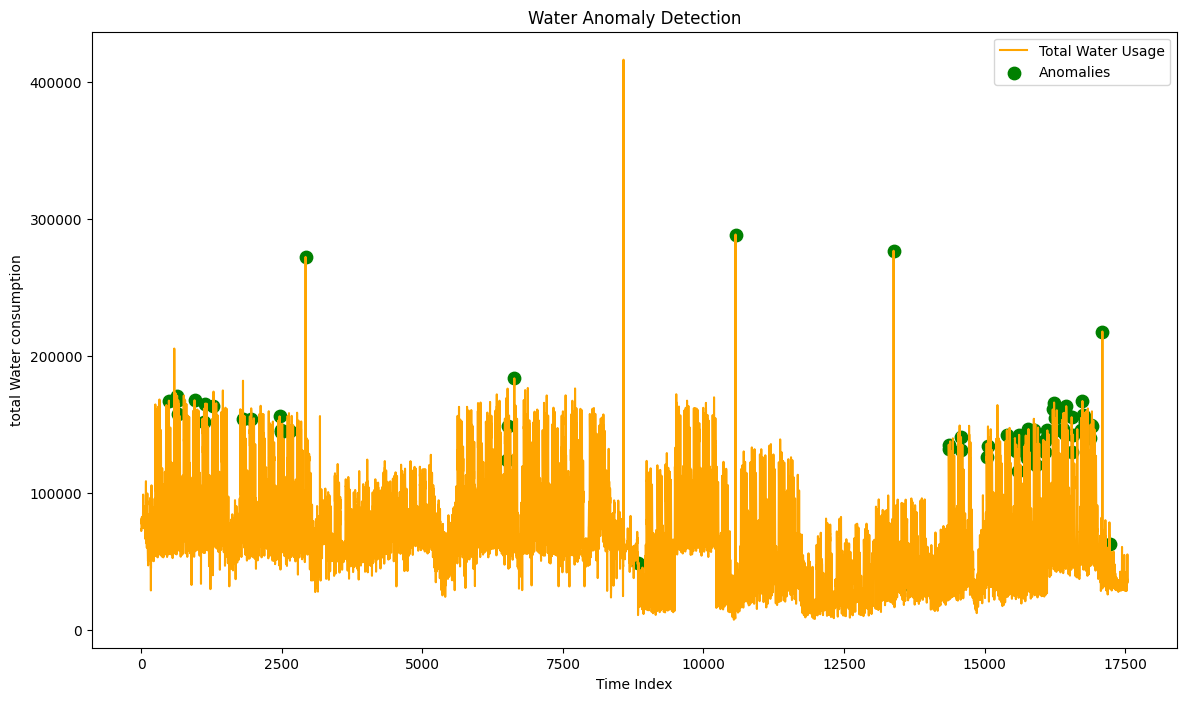

In [20]:
total_usage = x.sum(axis = 1) 
plt.figure(figsize = (14,8)) 

plt.plot(total_usage, label = "Total Water Usage", color = "orange") 

anomalies = results["Final_Anomaly"] == 1  

plt.scatter(np.where(anomalies)[0], 
            total_usage[anomalies],
            color = "green", 
            s = 80, 
            label = "Anomalies") 

plt.title("Water Anomaly Detection") 
plt.xlabel("Time Index") 
plt.ylabel("total Water consumption") 

plt.legend() 
plt.show() 

# Explanation 
Here,as we can see that the graph for the Time Series Water Anomaly Detection has been plotted and it correctly shows 85 anomalies here in this data.  

The orange lining basicaly represnts : 
  
   1. How the watwr data is used at each time 
   2. the normal pattern of consumption 
   3. peaks and drops.  

The green dots represnts the anomalies in the water meters due to high spikes shown here. 

In [23]:
# Saving thr whole combined data 

data_result.to_csv("water_anomaly_results.csv", index = False) 

print("\n✅ DONE! Results saved.") 



✅ DONE! Results saved.


In [ ]:
results.to_csv("Water_Anomaly_Model_Results.csv", index = False) # index = False prevents the unwanted extra column 

print("\n✅ DONE! Results saved.")  



✅ DONE! Results saved.
